# Auto tag the tickets with right priorities and right departments

## Import the necessary packages


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
import datetime as dt
import seaborn as sns
from scipy import stats
import pandas.util.testing as tm

## Load the dataset

In [212]:
data_parser=lambda c: pd.to_Dataframe(c,format='%d/%m/%Y %H:%M:%s')
data=pd.read_csv('C:\\Users\DELL\Desktop\Rubixe projects\Mar2020\ITSM_data.csv', parse_dates=['Open_Time','Reopen_Time','Close_Time','Resolved_Time'])

In [213]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [214]:
data.shape

(46606, 26)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  46606 non-null  int64         
 1   CI_Name                     46606 non-null  object        
 2   CI_Cat                      46495 non-null  object        
 3   CI_Subcat                   46495 non-null  object        
 4   WBS                         46606 non-null  object        
 5   Incident_ID                 46606 non-null  object        
 6   Status                      46606 non-null  object        
 7   Impact                      46606 non-null  object        
 8   Urgency                     46606 non-null  object        
 9   Priority                    45226 non-null  float64       
 10  number_cnt                  46606 non-null  float64       
 11  Category                    46606 non-null  object    

In [216]:
data.describe()

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,46606.00000,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,23302.50000,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,13454.13766,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,0.00000,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,11651.25000,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,23302.50000,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,34953.75000,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,46605.00000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


## Checking for outliers

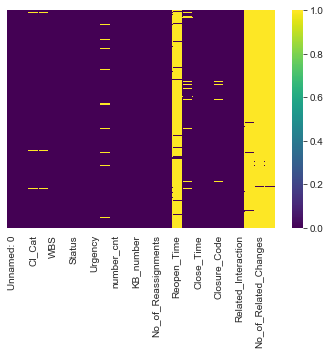

In [217]:
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

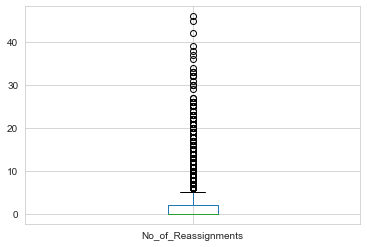

In [218]:
data[['No_of_Reassignments']].boxplot();

In [219]:
X=data.No_of_Reassignments

In [220]:
removed_outliers_Reassignments=X.between(X.quantile(0.7),X.quantile(0.9))

In [221]:
print(str(X[removed_outliers_Reassignments].size)+"/"+str(X.size)+" data points remain")

14837/46606 data points remain


Text(0.5, 0, 'No_of_Reassignments')

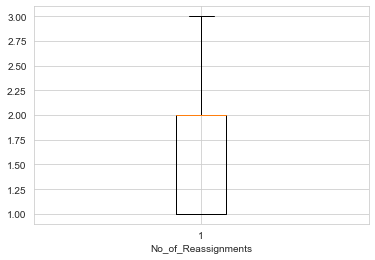

In [222]:
plt.boxplot(X[removed_outliers_Reassignments]);
plt.xlabel("No_of_Reassignments")

Text(0.5, 0, 'No_of_Reassignments')

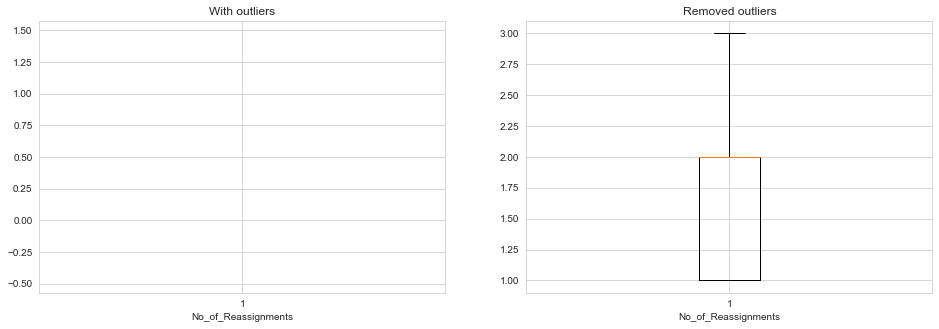

In [223]:
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Reassignments]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("No_of_Reassignments")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("No_of_Reassignments")

In [224]:
data['clean_Reassignments']=X[removed_outliers_Reassignments]

## Check for the EDA steps

In [225]:
data=data.drop(['Urgency','Impact','Alert_Status','Open_Time','Reopen_Time','Close_Time','Resolved_Time','No_of_Reassignments'],axis=1)

In [226]:
Counter(data.clean_Reassignments).most_common()

[(1.0, 7268),
 (2.0, 5378),
 (3.0, 2191),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 

In [227]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Priority,number_cnt,Category,KB_number,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,clean_Reassignments
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,0.601292,incident,KM0000553,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,0.415050,incident,KM0000611,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,0.517551,request for information,KM0000339,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN,3.0
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,0.642927,incident,KM0000611,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,0.345258,incident,KM0000611,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN,2.0


In [228]:
dataset=data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
dataset.head()

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


In [229]:
dataset.shape

(46606, 4)

In [230]:
dataset.isna().sum().to_frame().T

,CI_Cat,CI_Subcat,WBS,Category
0,111,111,0,0


In [231]:
dataset.dropna(inplace=True)

In [232]:
dataset.isna().sum().to_frame().T

,CI_Cat,CI_Subcat,WBS,Category
0,0,0,0,0


In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46495 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CI_Cat     46495 non-null  object
 1   CI_Subcat  46495 non-null  object
 2   WBS        46495 non-null  object
 3   Category   46495 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [234]:
dataset.describe()

,CI_Cat,CI_Subcat,WBS,Category
count,46495,46495,46495,46495
unique,12,64,272,4
top,application,Server Based Application,WBS000073,incident
freq,32900,18811,13342,37651


In [235]:
dataset.loc[data.clean_Reassignments>4.0,'tickets']='high'
dataset.loc[(data.clean_Reassignments>2.0)& (data.clean_Reassignments<=4.0),'tickets']='medium'
dataset.loc[data.clean_Reassignments<=2.0,'tickets']='low'

In [236]:
dataset.head(34)

,CI_Cat,CI_Subcat,WBS,Category,tickets
0,subapplication,Web Based Application,WBS000162,incident,NaN
1,application,Web Based Application,WBS000088,incident,NaN
2,application,Desktop Application,WBS000092,request for information,medium
3,application,Web Based Application,WBS000088,incident,NaN
4,application,Web Based Application,WBS000088,incident,low
5,application,Web Based Application,WBS000088,incident,NaN
6,application,Web Based Application,WBS000055,incident,low
7,application,Web Based Application,WBS000088,incident,NaN
8,application,Web Based Application,WBS000088,incident,low
9,application,Web Based Application,WBS000055,incident,low


## Define X and y

In [237]:
X=dataset.loc[:,dataset.columns!='tickets']
y=dataset.tickets

In [238]:
X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


In [239]:
y.isna().sum()

31690

In [240]:
y.fillna(method='ffill',inplace=True)

In [241]:
y.isna().sum()

2

In [242]:
y.fillna(method='bfill',inplace=True)

In [243]:
y.isna().sum()

0

## Use Label Encoder

In [244]:
enc=LabelEncoder()

X.CI_Cat=enc.fit_transform(X.CI_Cat)
X.CI_Subcat=enc.fit_transform(X.CI_Subcat)
X.WBS=enc.fit_transform(X.WBS)
X.Category=enc.fit_transform(X.Category)

X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,11,57,136,1
1,1,57,70,1
2,1,10,74,3
3,1,57,70,1
4,1,57,70,1


In [245]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46495 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CI_Cat     46495 non-null  int32
 1   CI_Subcat  46495 non-null  int32
 2   WBS        46495 non-null  int32
 3   Category   46495 non-null  int32
dtypes: int32(4)
memory usage: 1.1 MB


## Use train-test split

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.3)

In [247]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (32546, 4)
X_test shape =  (13949, 4)
y_train shape =  (32546,)
y_test shape =  (13949,)


## Using Random-Forest Classifier Algorithm
## Define the model

In [248]:
model=RandomForestClassifier(n_estimators=300,random_state=10,max_depth=4,criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [249]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict)*100)

84.83762276865725


In [250]:
pd.crosstab(y_test,y_predict)

col_0,low
tickets,
low,11834
medium,2115


In [251]:
print(confusion_matrix(y_test,y_predict))

[[11834     0]
 [ 2115     0]]


In [252]:
print("\n Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("\n Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  85.20555521415842

 Accuracy of Testing =   84.83762276865725

 Precision score: 71.97422237036992

 Recall score: 84.83762276865725

 F1 score: 77.87832508585424


In [253]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         low       0.85      1.00      0.92     11834
      medium       0.00      0.00      0.00      2115

    accuracy                           0.85     13949
   macro avg       0.42      0.50      0.46     13949
weighted avg       0.72      0.85      0.78     13949



## Using XGBoost

In [254]:
from xgboost import XGBClassifier

## Standardize a dataset along X axis

In [255]:
X=scale(X)

## Define X and y

In [256]:
X=dataset.loc[:,dataset.columns!='tickets']
y=dataset.tickets

## Using Label Encoder

In [257]:
enc=LabelEncoder()

X.CI_Cat=enc.fit_transform(X.CI_Cat)
X.CI_Subcat=enc.fit_transform(X.CI_Subcat)
X.WBS=enc.fit_transform(X.WBS)
X.Category=enc.fit_transform(X.Category)

X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,11,57,136,1
1,1,57,70,1
2,1,10,74,3
3,1,57,70,1
4,1,57,70,1


## Use train-test split

In [258]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.3)

In [259]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (32546, 4)
X_test shape =  (13949, 4)
y_train shape =  (32546,)
y_test shape =  (13949,)


## Define the model

In [260]:
model=XGBClassifier(max_depth=3,learning_rate=0.5,random_state=50,n_estimators=50)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [261]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [262]:
pd.crosstab(y_test,y_predict)

col_0,low
tickets,
low,11834
medium,2115


In [263]:
print(confusion_matrix(y_test,y_predict))

[[11834     0]
 [ 2115     0]]


In [264]:
print("\nTrain accuracy = " ,accuracy_score(y_train,y_train_predict)*100)
print("\nTest accuracy = " ,accuracy_score(y_test,y_predict)*100)
print("\nPrecision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\nRecall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\nF1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


Train accuracy =  85.20555521415842

Test accuracy =  84.83762276865725

Precision score: 71.97422237036992

Recall score: 84.83762276865725

F1 score: 77.87832508585424


In [265]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         low       0.85      1.00      0.92     11834
      medium       0.00      0.00      0.00      2115

    accuracy                           0.85     13949
   macro avg       0.42      0.50      0.46     13949
weighted avg       0.72      0.85      0.78     13949

